# Project 01 - Color Compression

## Thông tin sinh viên

- Họ và tên: Trịnh Anh Tài
- MSSV: 22127373
- Lớp: 22CLC09

## Import các thư viện liên quan

In [6]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Helper functions

In [7]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image (2D)
    '''
    img = Image.open(img_path)
    img = np.array(img)
    return img


def show_img(img_2d):
    '''
    Show image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    '''
    plt.imshow(img_2d)
    plt.axis('off')


def save_img(img_2d, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    img_path : str
        Path of image
    '''
    img = Image.fromarray(img_2d)
    img.save(img_path)


def convert_img_to_1d(img_2d):
    '''
    Convert 2D image to 1D image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)

    Returns
    -------
        Image (1D)
    '''
    return img_2d.reshape(-1, 3)


def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm

    Parameters
    ----------
    img_1d : np.ndarray with shape=(height * width, num_channels)
        Original (1D) image
    k_clusters : int
        Number of clusters
    max_iter : int
        Max iterator
    init_centroids : str, default='random'
        The method used to initialize the centroids for K-means clustering
        'random' --> Centroids are initialized with random values between 0 and 255 for each channel
        'in_pixels' --> A random pixel from the original image is selected as a centroid for each cluster

    Returns
    -------
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Stores the color centroids for each cluster
    labels : np.ndarray with shape=(height * width, )
        Stores the cluster label for each pixel in the image
    '''
    if init_centroids == 'random': # centroids are initialized with random values between 0 and 255 for each color channel.
        centroids = np.random.randint(0, 256, (k_clusters, 3)).astype(np.float32)
    elif init_centroids == 'in_pixels': # centroids are initialized using random pixels from the image.
        random_indices = np.random.choice(img_1d.shape[0], k_clusters, replace=False)
        centroids = img_1d[random_indices].astype(np.float32)
    else:
        raise ValueError("Invalid value for init_centroids. Choose either 'random' or 'in_pixels'.")
    
    for _ in range(max_iter):
        # Calculate distances from each pixel to each centroid in the RGB color space.
        distances = np.sqrt(((img_1d - centroids[:, np.newaxis])**2).sum(axis=2))
        
        # Assign each pixel to the nearest centroid
        labels = np.argmin(distances, axis=0)
        
        # Recalculate centroids based on the mean of all pixels assigned to each centroid.
        new_centroids = []
        for i in range(k_clusters):
            cluster_pixels = img_1d[labels == i]
            if len(cluster_pixels) > 0:
                new_centroid = cluster_pixels.mean(axis=0)
            else:
                # Handle empty clusters by skipping update or reassigning centroid
                # Example: Skip update
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)
        new_centroids = np.array(new_centroids)
        
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels


def generate_2d_img(img_2d_shape, centroids, labels):
    '''
    Generate a 2D image based on K-means cluster centroids

    Parameters
    ----------
    img_2d_shape : tuple (height, width, 3)
        Shape of image
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Store color centroids
    labels : np.ndarray with shape=(height * width, )
        Store label for pixels (cluster's index on which the pixel belongs)

    Returns
    -------
        New image (2D)
    '''
    new_img = centroids[labels].reshape(img_2d_shape).astype(np.uint8)
    return new_img


# Your additional functions here
def save_img_as_pdf(img_2d, pdf_path):
    '''
    Save image as PDF to pdf_path

    Parameters
    ----------
    img_2d : np.ndarray
        Image (2D)
    pdf_path : str
        Path of PDF file
    '''
    img = Image.fromarray(img_2d)
    img = img.convert('RGB')  # Convert to RGB mode
    img.save(pdf_path, 'PDF')

def save_img_as_jpeg(img_2d, jpeg_path):
    '''
    Save image as JPEG to jpeg_path

    Parameters
    ----------
    img_2d : np.ndarray
        Image (2D)
    jpeg_path : str
        Path of JPEG file
    '''
    img = Image.fromarray(img_2d)
    img = img.convert('RGB')
    img.save(jpeg_path, 'JPEG')

## Your tests

In [8]:
# YOUR CODE HERE

## Main FUNCTION

In [9]:
def main():
    # Input image path / Input output path
    input_image_path = input("Enter the path to the input image (with extension): ").strip()
    output_image_path_base = input("Enter the base path for the output image (without extension): ").strip()
    
    # Ask user for format
    format = input("Format? (png/pdf/jpeg(jpg)): ")
    
    # Ensure output directory exists
    output_dir = os.path.dirname(output_image_path_base)
    if output_dir and not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Read the image
    # Ensure input directory exists
    if not os.path.exists(input_image_path):
        print("Invalid input image path")
        return
    img = read_img(input_image_path)
    show_img(img)

    # Convert image to 1D
    img_1d = convert_img_to_1d(img)

    # Apply K-means clustering
    k_clusters = 7
    max_iter = 16
    centroids, labels = kmeans(img_1d, k_clusters, max_iter, 'random')
    
    # Generate new image
    new_img = generate_2d_img(img.shape, centroids, labels)
    show_img(new_img)

    # Save new image in PNG format
    if format == "png":
        save_img(new_img, output_image_path_base + ".png")
    # Save new image in PDF format
    elif format == "pdf":
        save_img_as_pdf(new_img, output_image_path_base + ".pdf")
    elif format == "jpeg" or format == "jpg":
        save_img_as_jpeg(new_img, output_image_path_base + ".jpeg")
    else:
        print("Invalid format, can't save the image.")
        return

Invalid format


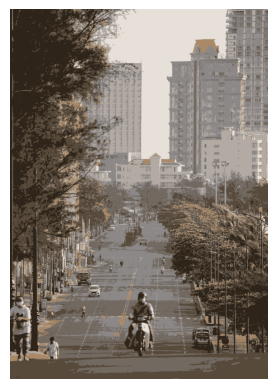

In [10]:
# Call main function
if __name__ == "__main__":
    main()